In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean_dataset = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean_dataset.data.features 
y = dry_bean_dataset.data.targets 
  
# metadata 
print(dry_bean_dataset.metadata) 
  
# variable information 
print(dry_bean_dataset.variables) 



{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
from ucimlrepo import fetch_ucirepo 
  
dry_bean_dataset = fetch_ucirepo(id=602) 
   
X = dry_bean_dataset.data.features 
Y = dry_bean_dataset.data.targets 
  
DF = pd.concat([X, Y], axis=1)


In [5]:
DF.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
#from example provided

Y = DF['Class']

X = DF.drop('Class', axis=1)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)


In [8]:
clf = tree.DecisionTreeClassifier(criterion='gini')

In [9]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [10]:
Y_predictions = clf.predict(X_test)

In [29]:
cm = confusion_matrix(Y_predictions, Y_test)

In [27]:
print(cm)

[[353   0  29   0   4   3   7]
 [  0 156   0   0   0   0   0]
 [ 29   1 443   0  15   0   6]
 [  0   0   0 963   5  18  87]
 [  4   0  13   3 529   0  12]
 [  3   0   2  18   0 567  23]
 [  8   0   2  80  25  20 656]]


In [12]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [13]:
accuracy(cm)

0.8978942213516161

In [30]:
Training_Error = 1 - clf.score(X_train, Y_train)
print("The Training Error is:", Training_Error)

The Training Error is: 0.0


In [31]:
Testing_error = 1 - clf.score(X_test, Y_test)
print("The Testing Error is:", Testing_error)

The Testing Error is: 0.10210577864838388


In [32]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [38]:
def evaluate_tree_depths(depths, X_train, Y_train, X_test, Y_test):
    Training_error = []
    Testing_error = []

    for depth in depths:
        clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth)
        clf.fit(X_train, Y_train)
        

        Training_error.append(1 - clf.score(X_train, Y_train))
        Testing_error.append(1 - clf.score(X_test, Y_test))

    return depths, Training_error, Testing_error



In [39]:
depths = range(1, 20)  
depths, Training_error, Testing_error = evaluate_tree_depths(depths, X_train, Y_train, X_test, Y_test)

for depth, train_error, test_error in zip(depths, Training_error, Testing_error):
    print(f"Depth: {depth}, Training Error: {train_error}, Testing Error: {test_error}")


Depth: 1, Training Error: 0.593786081662643, Testing Error: 0.5883937316356513
Depth: 2, Training Error: 0.34491445365802453, Testing Error: 0.3432908912830558
Depth: 3, Training Error: 0.22252545397291912, Testing Error: 0.2225759059745348
Depth: 4, Training Error: 0.1732969455232497, Testing Error: 0.1699314397649363
Depth: 5, Training Error: 0.11073790280256113, Testing Error: 0.10945151811949072
Depth: 6, Training Error: 0.08764563871103181, Testing Error: 0.09990205680705189
Depth: 7, Training Error: 0.07358035058255485, Testing Error: 0.09378060724779624
Depth: 8, Training Error: 0.06245407788390889, Testing Error: 0.09010773751224288
Depth: 9, Training Error: 0.049228508449669306, Testing Error: 0.08423114593535752
Depth: 10, Training Error: 0.03789230607746408, Testing Error: 0.0866797257590598
Depth: 11, Training Error: 0.028340505930513293, Testing Error: 0.08863858961802151
Depth: 12, Training Error: 0.022147580560512248, Testing Error: 0.09255631733594516
Depth: 13, Trainin

In [40]:
depths = range(1, 20)  # From depth 1 to 20


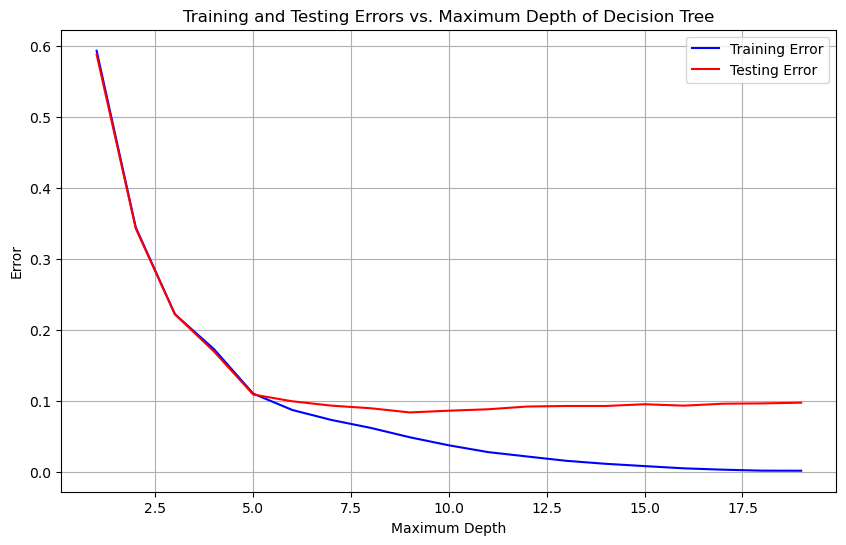

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(depths, Training_error, label='Training Error', color='blue')
plt.plot(depths, Testing_error, label='Testing Error', color='red')

plt.xlabel('Maximum Depth')
plt.ylabel('Error')
plt.title('Training and Testing Errors vs. Maximum Depth of Decision Tree')
plt.legend()
plt.grid(True)


plt.show()

In [23]:
#The table above show the relationship between the maximum depth of 
#the decision tree and the training/testing errors. 
#Initially, as the tree's depth increases, the model becomes more 
#complex and better fits the training data, leading to a decrease in 
#training error. However, beyond a certain depth (around 5), 
#the testing error stabilizes, showing that the model's performance 
#on unseen data does not significantly improve with further increases 
#in depth. This suggests a trade-off between model complexity and 
#generalization to new data. At smaller depths, the model may underfit 
#the data, resulting in high errors on both training and testing sets. 
#On the other hand, at larger depths, the model may overfit the training 
#data, capturing noise and leading to a gap between training and testing 
#errors. Therefore, selecting an optimal depth is crucial to balance 
#bias and variance and achieve the best model performance.
